
Loading Libraries and Image Preprocessing

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Dense, Dropout, Flatten
from keras.preprocessing import image
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import random
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, StratifiedKFold
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper'

/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper


In [ ]:
from zipfile import ZipFile
zip_file = '/content/Pepper_Train.zip'

with ZipFile(zip_file, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
cd '/content/Train'

/content/Train


In [ ]:
ls | wc -l

13853


In [ ]:
train_directory = '/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/Dataset/Train'
classes = ["Healthy", "Bacterial Spot"]

In [ ]:
# https://www.analyseup.com/python-machine-learning/stratified-kfold.html

train_data = pd.read_csv('/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/train_labels.csv')
print(f"Data Ratio: {sum(train_data['labels']/len(train_data['labels']))}")
train_data['labels'] = train_data['labels'].astype(str)
Y = train_data[['labels']]

kf = KFold(n_splits = 5)
                         
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 

train_data

Data Ratio: 0.4032339565437425


,filename,labels
0,Gaussian_Noise_Pepper_Bell_Healthy_0694.JPG,0
1,Pepper_Bell_Bacterial_Spot_0287.JPG,1
2,Rotate_After_Flip_Vertical_Flip_Pepper_Bell_He...,0
3,Rotate_After_Flip_Vertical_Flip_Pepper_Bell_He...,0
4,Pepper_Bell_Healthy_1008.JPG,0
...,...,...
13848,Rotate_After_Flip_Vertical_Flip_Pepper_Bell_Ba...,1
13849,Rotate_Before_Flip_Pepper_Bell_Healthy_1405.JPG,0
13850,Gaussian_Blur_Pepper_Bell_Healthy_0540.JPG,0
13851,Pepper_Bell_Healthy_0187.JPG,0


In [ ]:
print(f"Total Size of Dataset: {len(train_data)}")

Total Size of Dataset: 13853


In [ ]:
# fold_no = 1
# for train_index, test_index in skf.split(train_data, Y):
#   train = train_data.loc[train_index,:]
#   test = train_data.loc[test_index,:]
#   #print('Fold',str(fold_no),'Class Ratio:',sum(test['labels'])/len(test['labels']))
#   print(f"Fold {str(fold_no)} Class Ratio {sum(test['labels'])/len(test['labels'])}")
#   fold_no += 1

([<matplotlib.axis.XTick at 0x7f9c3c800f40>,
 [Text(0, 0, 'Healthy'), Text(0, 0, 'Bacterial Spot')])

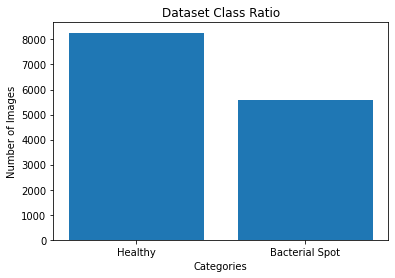

In [ ]:
#Checking if distribution of target labels are equal
# 1 Indicates Healthy
# ) Indicated Bacterial Spot
x_bars = ["Healthy", "Bacterial Spot"]
plt.bar(Y['labels'].value_counts().index, Y['labels'].value_counts().values)
plt.title('Dataset Class Ratio')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(Y['labels'].value_counts().index, x_bars)

In [ ]:
name = 'Vertical_Flip_Tomato_Healthy_0191.JPG'

In [ ]:
for root, dirs, files in os.walk('/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/Train'):
  if name in files:
    print("True")
  else:
    print("False")


In [ ]:
cd '/content/Train'

/content/Train


In [ ]:
count = 0
for root, dirs, files in os.walk('/content/Train'):
  for name in files:
    # print(name)
    count += 1

print(count)

13853


In [ ]:
cd '/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/Train'

/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/Train


In [ ]:
ls | wc -l

9592


In [ ]:
img_datagen = ImageDataGenerator(width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.3,
                         fill_mode='nearest',
                         horizontal_flip = False,
                         rescale=1./255)

In [ ]:
# Sources for model consideration:
# https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
# https://towardsdatascience.com/how-to-train-a-classification-model-with-tensorflow-in-10-minutes-fd2b7cfba86#6d40
def create_new_model(IMG_SIZE):
  # Test Model - LeNet
  model = Sequential([
                      # 1st Convolutional Layer
                      Conv2D(16, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),    # After this convulutional layer the image size is 426 x 426
                      MaxPooling2D(),

                      # 2nd Convolutional Layer
                      Conv2D(32, kernel_size=5, strides=1, padding='valid', activation='relu'),
                      MaxPooling2D(),

                      # 3rd Convolutional Layer
                      Conv2D(64, kernel_size=5, strides=1, padding='valid', activation='relu'),
                      MaxPooling2D(),

                      # Passing to fully connected Layer
                      Flatten(),
                      Dense(512, activation='relu'),
                      # Dropout implemented to remove neurons that aren't being used and prevent overfitting
                      Dropout(0.5),

                       # Output: Using sigmoid as my activation function since I am making a binary classifier
                      Dense(1, activation='sigmoid')


  ])
  model.summary()

  return model
  # model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 256
EPOCHS = 30

In [ ]:
# Potential issue
# Might have to write absolute path in csv file for filenames since validate_filenames is defaulted to true in train_data_generator

In [ ]:
def create_callbacks(model_name):
		early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)
		checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
              monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='max')
		return [early_stopping, checkpoint]

Sources:


In [ ]:
keras.backend.clear_session()
#tf.keras.backend.clear_session

In [ ]:
all_history = {}

image_directory = '/content/Train'
save_dir = '/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/SGD_Saved_Models'

fold = 1
for train_index, val_index in skf.split(train_data,Y):
  print(f"Starting Fold {fold}")
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_generator = img_datagen.flow_from_dataframe(training_data,
                                                      x_col='filename',
                                                      y_col='labels',
                                                      directory=image_directory,
                                                      target_size=(IMG_SIZE, IMG_SIZE),
                                                      batch_size=BATCH_SIZE,
                                                      class_mode='binary',
                                                      color_mode='rgb',
                                                      validate_filenames=True,
                                                      shuffle=True)

  valid_generator = img_datagen.flow_from_dataframe(validation_data,
                                              x_col='filename',
                                              y_col='labels',
                                              directory=image_directory,
                                              target_size=(IMG_SIZE, IMG_SIZE),
                                              batch_size=BATCH_SIZE,
                                              class_mode='binary',
                                              color_mode='rgb',
                                              validate_filenames=True,
                                              shuffle=True)

  # Create new model
  model = create_new_model(IMG_SIZE)

  model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])
  
  # Model is saved at each epoch and best is saved before moving to the next fold
  model_name = f'/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/New_Model_SGD_Saved_Model_3/best-model-kfold-{fold}.hdf5'
  history = model.fit(train_generator,
                      validation_data=valid_generator,
                      epochs=EPOCHS,
                      callbacks=create_callbacks(model_name))
  model.save(f'/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/h5_New_Model_SGD_Saved_Model_3/best-model-kfold-{fold}.h5')
  all_history[f'history-fold-{fold}'] = history

  fold += 1

  
  print("\n")

Starting Fold 1
Found 11082 validated image filenames belonging to 2 classes.
Found 2771 validated image filenames belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 64)  

In [ ]:
all_history

{'history-fold-1': <keras.callbacks.History at 0x7f4e50399490>,
 'history-fold-2': <keras.callbacks.History at 0x7f4e003b51d0>,
 'history-fold-3': <keras.callbacks.History at 0x7f4de879b0d0>,
 'history-fold-4': <keras.callbacks.History at 0x7f4de835fc10>,
 'history-fold-5': <keras.callbacks.History at 0x7f4dc571ae50>}

# Creating Deep CNN using a LeNet Structure

Text(0.5, 0, 'Epochs')

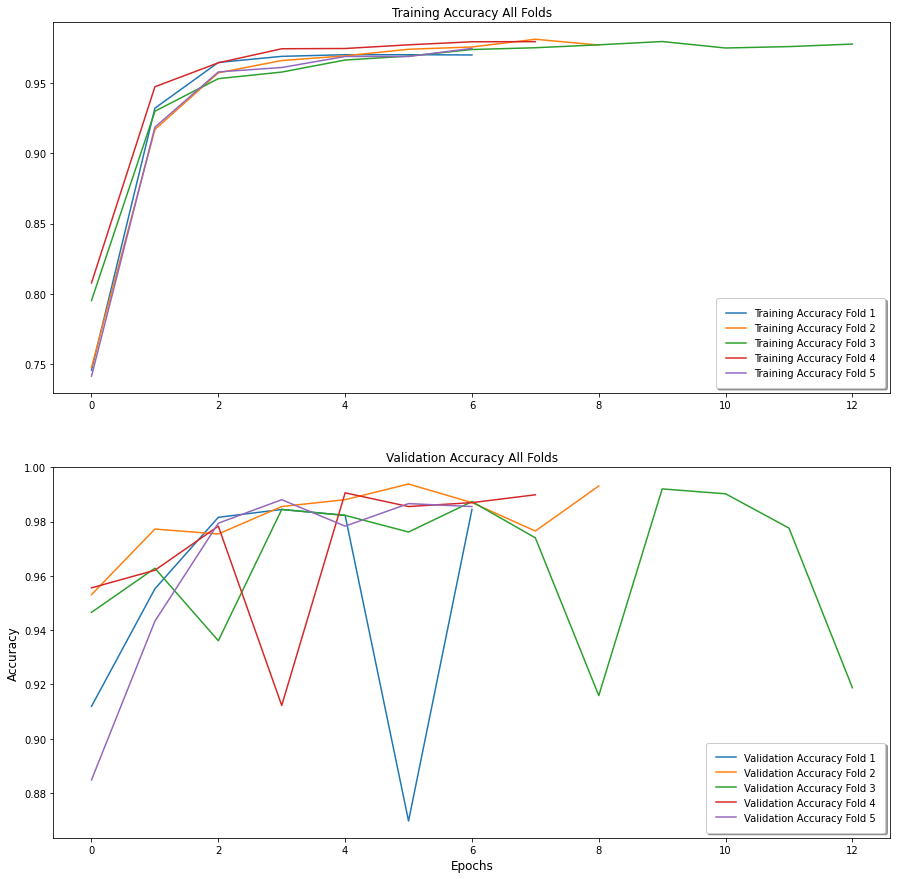

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

axs[0].plot(all_history['history-fold-1'].history['accuracy'], label = 'Training Accuracy Fold 1')
axs[0].plot(all_history['history-fold-2'].history['accuracy'], label = 'Training Accuracy Fold 2')
axs[0].plot(all_history['history-fold-3'].history['accuracy'], label = 'Training Accuracy Fold 3')
axs[0].plot(all_history['history-fold-4'].history['accuracy'], label = 'Training Accuracy Fold 4')
axs[0].plot(all_history['history-fold-5'].history['accuracy'], label = 'Training Accuracy Fold 5')

axs[0].title.set_text('Training Accuracy All Folds')
axs[0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

axs[1].plot(all_history['history-fold-1'].history['val_accuracy'], label = 'Validation Accuracy Fold 1')
axs[1].plot(all_history['history-fold-2'].history['val_accuracy'], label = 'Validation Accuracy Fold 2')
axs[1].plot(all_history['history-fold-3'].history['val_accuracy'], label = 'Validation Accuracy Fold 3')
axs[1].plot(all_history['history-fold-4'].history['val_accuracy'], label = 'Validation Accuracy Fold 4')
axs[1].plot(all_history['history-fold-5'].history['val_accuracy'], label = 'Validation Accuracy Fold 5')

axs[1].title.set_text('Validation Accuracy All Folds')
axs[1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)  

plt.ylabel("Accuracy", fontsize = 12)
plt.xlabel("Epochs", fontsize = 12)


Text(0.5, 0, 'Epochs')

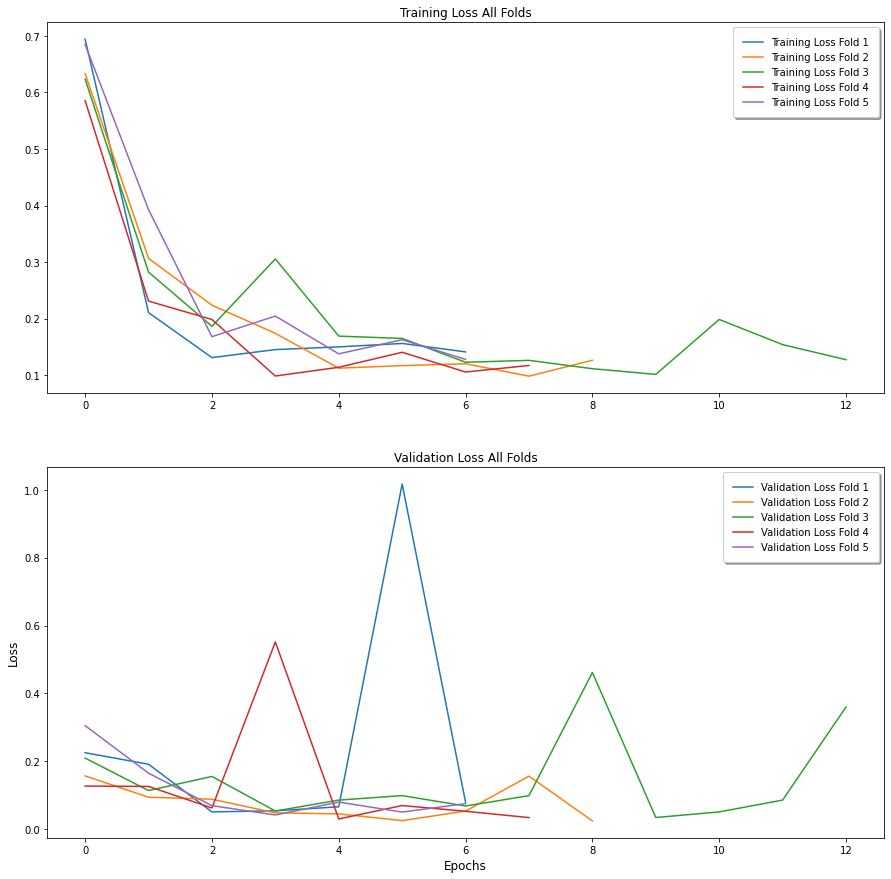

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

axs[0].plot(all_history['history-fold-1'].history['loss'], label = 'Training Loss Fold 1')
axs[0].plot(all_history['history-fold-2'].history['loss'], label = 'Training Loss Fold 2')
axs[0].plot(all_history['history-fold-3'].history['loss'], label = 'Training Loss Fold 3')
axs[0].plot(all_history['history-fold-4'].history['loss'], label = 'Training Loss Fold 4')
axs[0].plot(all_history['history-fold-5'].history['loss'], label = 'Training Loss Fold 5')

axs[0].title.set_text('Training Loss All Folds')
axs[0].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

axs[1].plot(all_history['history-fold-1'].history['val_loss'], label = 'Validation Loss Fold 1')
axs[1].plot(all_history['history-fold-2'].history['val_loss'], label = 'Validation Loss Fold 2')
axs[1].plot(all_history['history-fold-3'].history['val_loss'], label = 'Validation Loss Fold 3')
axs[1].plot(all_history['history-fold-4'].history['val_loss'], label = 'Validation Loss Fold 4')
axs[1].plot(all_history['history-fold-5'].history['val_loss'], label = 'Validation Loss Fold 5')

axs[1].title.set_text('Validation Loss All Folds')
axs[1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)  

plt.ylabel("Loss", fontsize = 12)
plt.xlabel("Epochs", fontsize = 12)

Text(0.5, 0, 'Epochs')

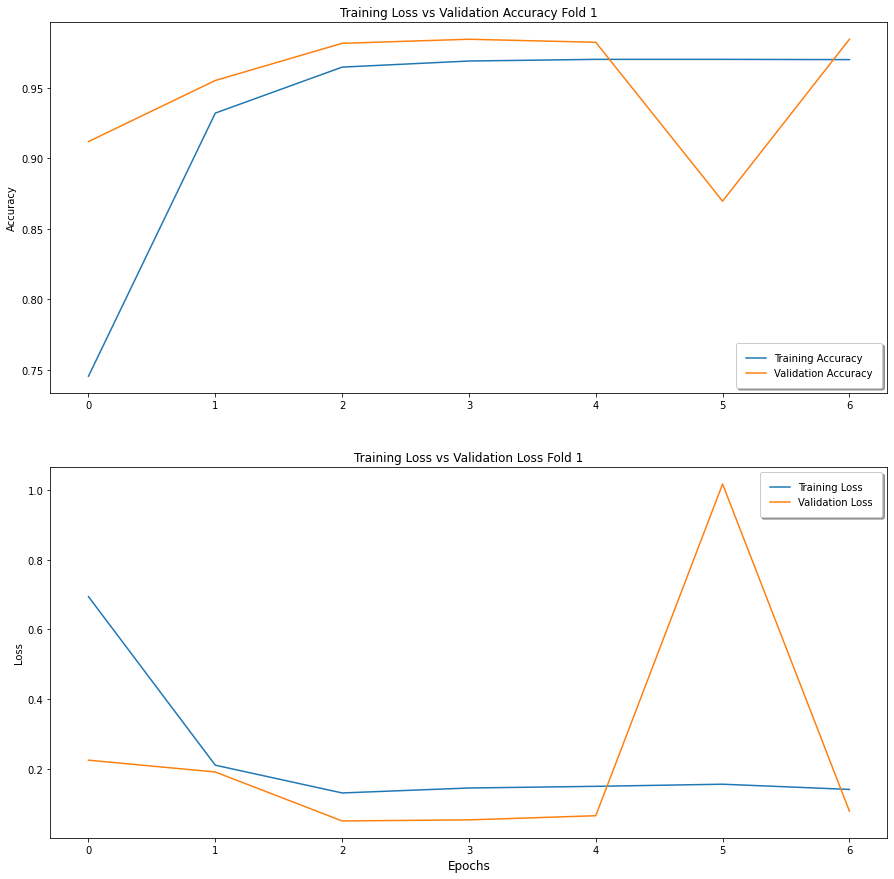

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

axs[0].plot(all_history['history-fold-1'].history['accuracy'], label = 'Training Accuracy')
axs[0].plot(all_history['history-fold-1'].history['val_accuracy'], label = 'Validation Accuracy')
axs[0].title.set_text('Training Loss vs Validation Accuracy Fold 1')
axs[0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


axs[1].plot(all_history['history-fold-1'].history['loss'], label = 'Training Loss')
axs[1].plot(all_history['history-fold-1'].history['val_loss'], label = 'Validation Loss')
axs[1].title.set_text('Training Loss vs Validation Loss Fold 1')
axs[1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)  


plt.setp(axs[0], ylabel='Accuracy')
plt.setp(axs[1], ylabel='Loss')
plt.xlabel("Epochs", fontsize = 12)


Text(0.5, 0, 'Epochs')

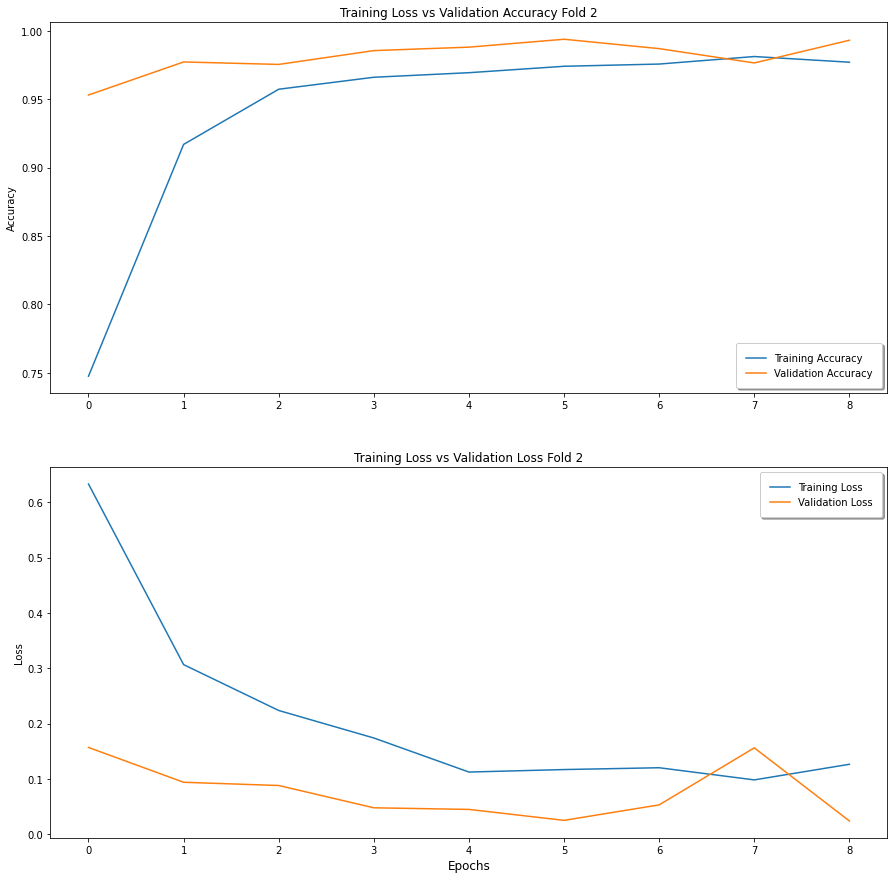

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

axs[0].plot(all_history['history-fold-2'].history['accuracy'], label = 'Training Accuracy')
axs[0].plot(all_history['history-fold-2'].history['val_accuracy'], label = 'Validation Accuracy')
axs[0].title.set_text('Training Loss vs Validation Accuracy Fold 2')
axs[0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


axs[1].plot(all_history['history-fold-2'].history['loss'], label = 'Training Loss')
axs[1].plot(all_history['history-fold-2'].history['val_loss'], label = 'Validation Loss')
axs[1].title.set_text('Training Loss vs Validation Loss Fold 2')
axs[1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)   


plt.setp(axs[0], ylabel='Accuracy')
plt.setp(axs[1], ylabel='Loss')
plt.xlabel("Epochs", fontsize = 12)


Text(0.5, 0, 'Epochs')

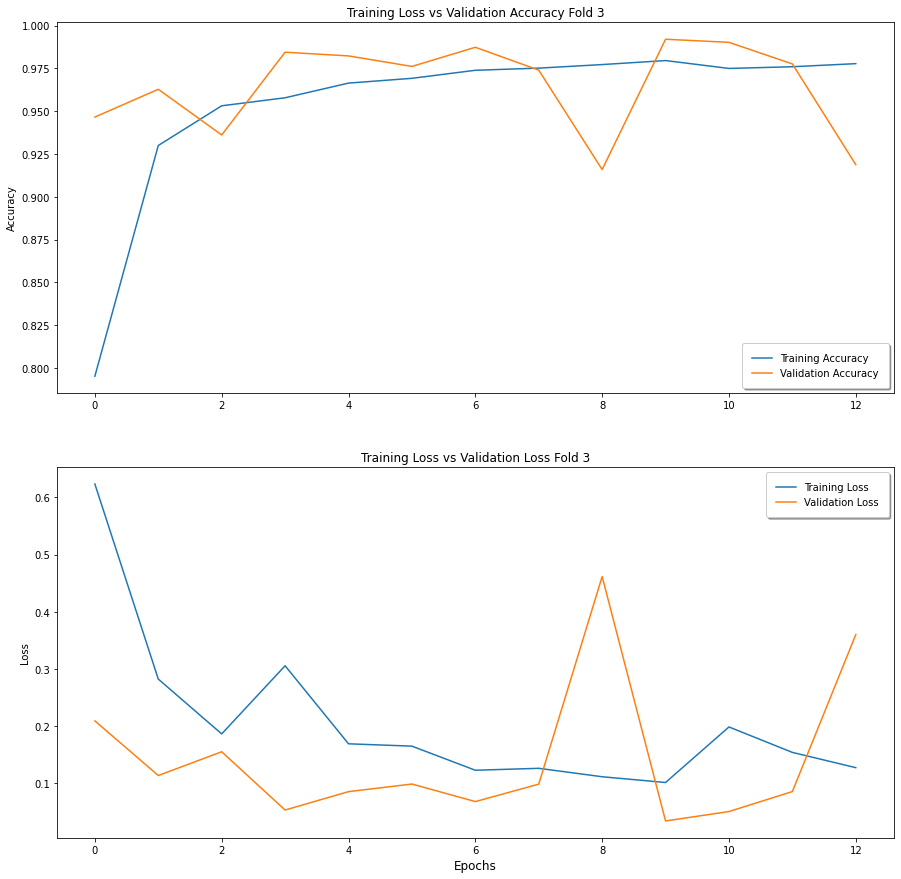

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

axs[0].plot(all_history['history-fold-3'].history['accuracy'], label = 'Training Accuracy')
axs[0].plot(all_history['history-fold-3'].history['val_accuracy'], label = 'Validation Accuracy')
axs[0].title.set_text('Training Loss vs Validation Accuracy Fold 3')
axs[0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


axs[1].plot(all_history['history-fold-3'].history['loss'], label = 'Training Loss')
axs[1].plot(all_history['history-fold-3'].history['val_loss'], label = 'Validation Loss')
axs[1].title.set_text('Training Loss vs Validation Loss Fold 3')
axs[1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)  


plt.setp(axs[0], ylabel='Accuracy')
plt.setp(axs[1], ylabel='Loss')
plt.xlabel("Epochs", fontsize = 12)


Text(0.5, 0, 'Epochs')

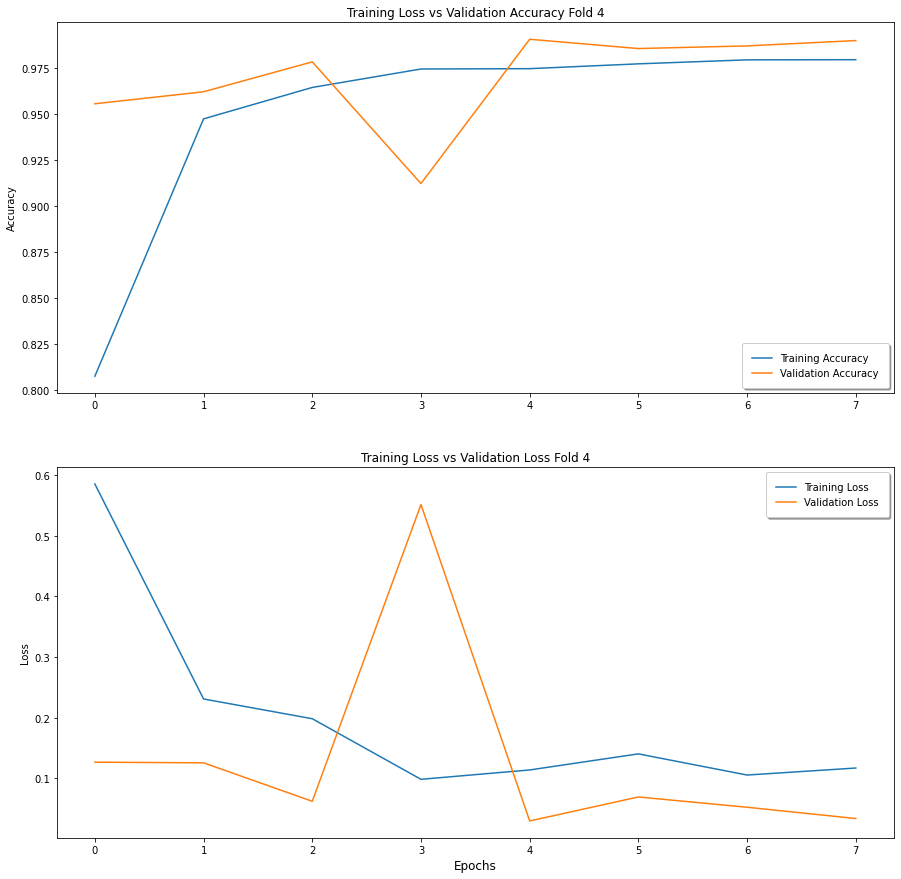

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

axs[0].plot(all_history['history-fold-4'].history['accuracy'], label = 'Training Accuracy')
axs[0].plot(all_history['history-fold-4'].history['val_accuracy'], label = 'Validation Accuracy')
axs[0].title.set_text('Training Loss vs Validation Accuracy Fold 4')
axs[0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


axs[1].plot(all_history['history-fold-4'].history['loss'], label = 'Training Loss')
axs[1].plot(all_history['history-fold-4'].history['val_loss'], label = 'Validation Loss')
axs[1].title.set_text('Training Loss vs Validation Loss Fold 4')
axs[1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)  


plt.setp(axs[0], ylabel='Accuracy')
plt.setp(axs[1], ylabel='Loss')
plt.xlabel("Epochs", fontsize = 12)


Text(0.5, 0, 'Epochs')

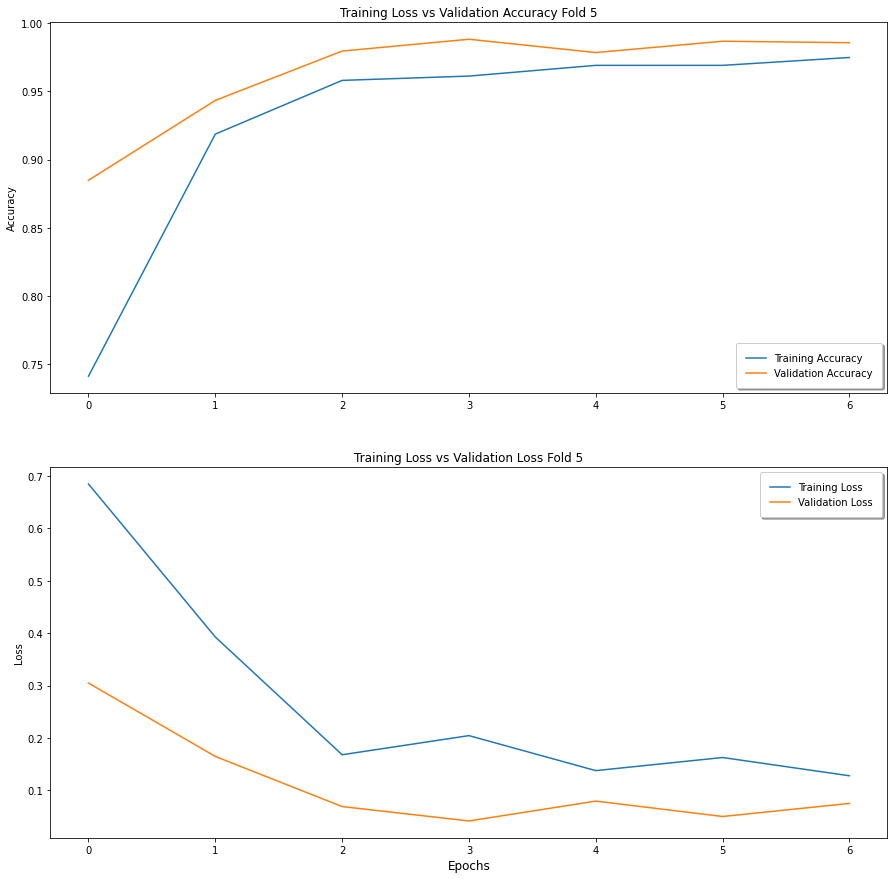

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

axs[0].plot(all_history['history-fold-5'].history['accuracy'], label = 'Training Accuracy')
axs[0].plot(all_history['history-fold-5'].history['val_accuracy'], label = 'Validation Accuracy')
axs[0].title.set_text('Training Loss vs Validation Accuracy Fold 5')
axs[0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


axs[1].plot(all_history['history-fold-5'].history['loss'], label = 'Training Loss')
axs[1].plot(all_history['history-fold-5'].history['val_loss'], label = 'Validation Loss')
axs[1].title.set_text('Training Loss vs Validation Loss Fold 5')
axs[1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)  


plt.setp(axs[0], ylabel='Accuracy')
plt.setp(axs[1], ylabel='Loss')
plt.xlabel("Epochs", fontsize = 12)


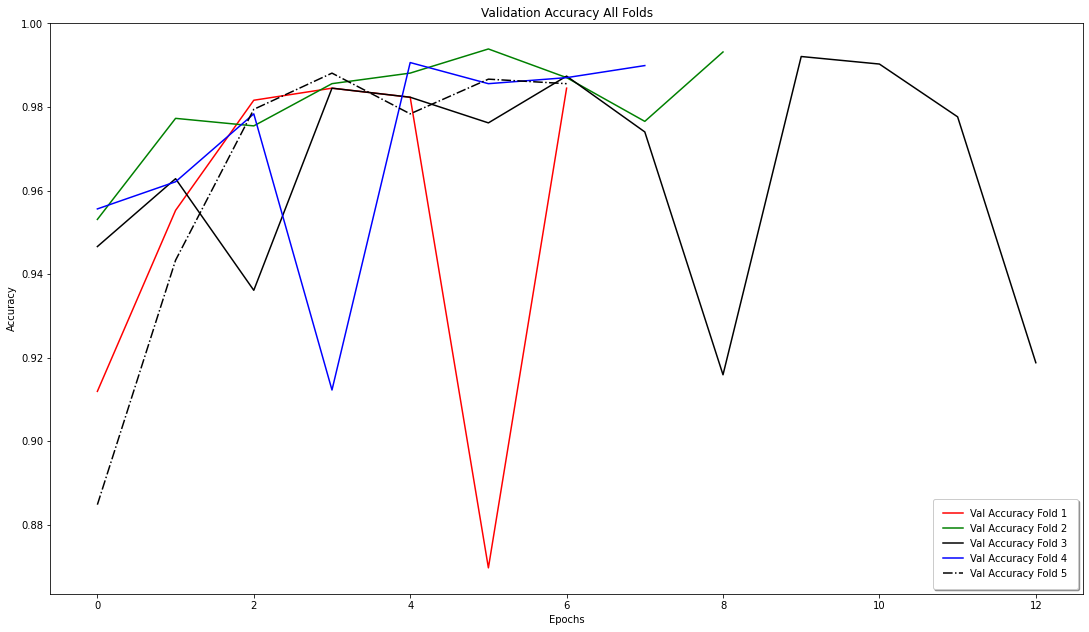

In [ ]:
# fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

plt.title('Validation Accuracy All Folds')
plt.plot(all_history['history-fold-1'].history['val_accuracy'], label='Val Accuracy Fold 1', color='red')
plt.plot(all_history['history-fold-2'].history['val_accuracy'], label='Val Accuracy Fold 2', color='green')
plt.plot(all_history['history-fold-3'].history['val_accuracy'], label='Val Accuracy Fold 3', color='black')
plt.plot(all_history['history-fold-4'].history['val_accuracy'], label='Val Accuracy Fold 4', color='blue')
plt.plot(all_history['history-fold-5'].history['val_accuracy'], label='Val Accuracy Fold 5', color='black', linestyle = "dashdot")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

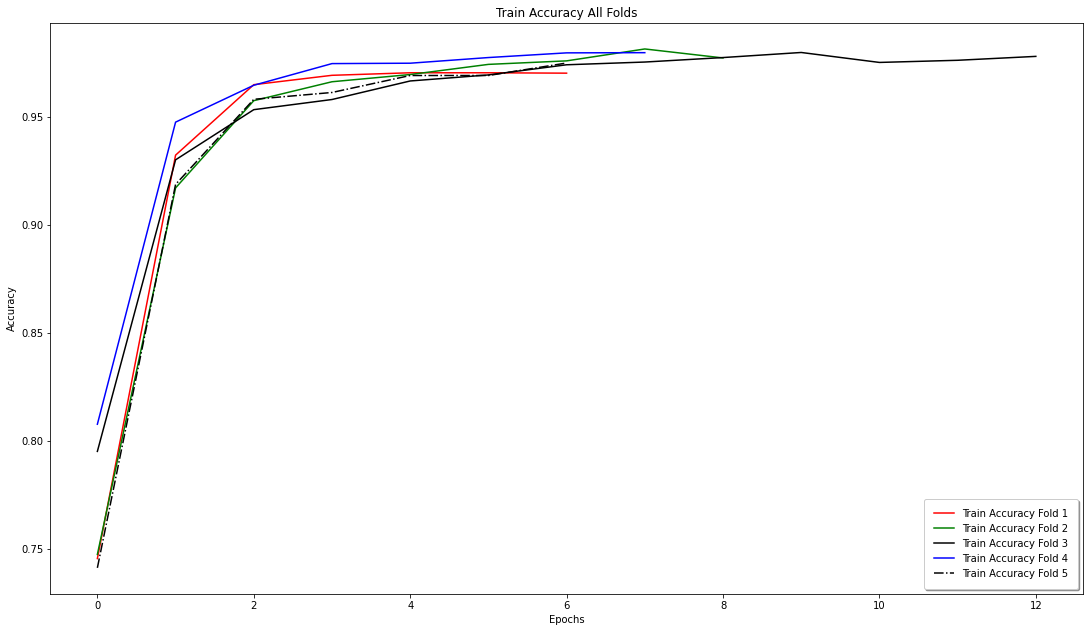

In [ ]:
plt.title('Train Accuracy All Folds')
plt.plot(all_history['history-fold-1'].history['accuracy'], label='Train Accuracy Fold 1', color='red')
plt.plot(all_history['history-fold-2'].history['accuracy'], label='Train Accuracy Fold 2', color='green')
plt.plot(all_history['history-fold-3'].history['accuracy'], label='Train Accuracy Fold 3', color='black')
plt.plot(all_history['history-fold-4'].history['accuracy'], label='Train Accuracy Fold 4', color='blue')
plt.plot(all_history['history-fold-5'].history['accuracy'], label='Train Accuracy Fold 5', color='black', linestyle = "dashdot")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

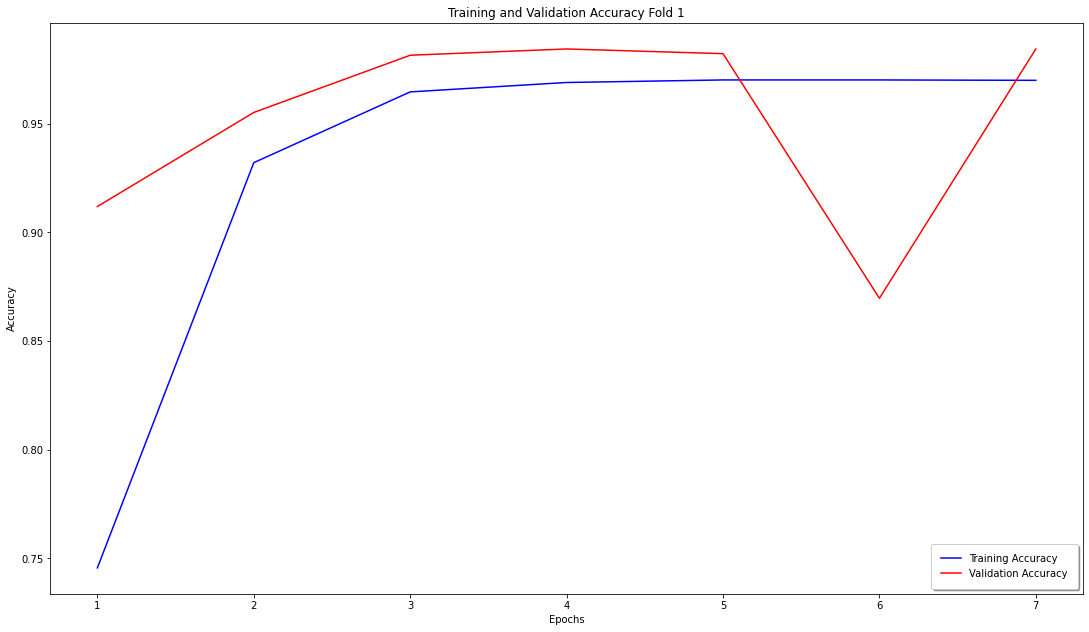

In [ ]:
history = all_history['history-fold-1'].history
loss_values = history["accuracy"]
val_loss_values = history["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy Fold 1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

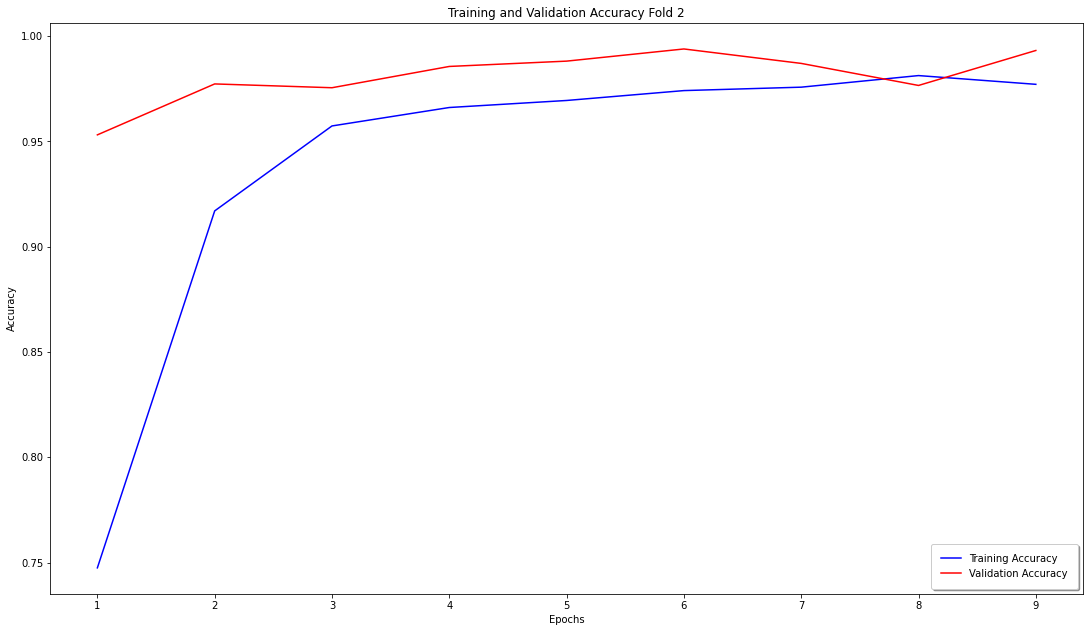

In [ ]:
history = all_history['history-fold-2'].history
loss_values = history["accuracy"]
val_loss_values = history["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy Fold 2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

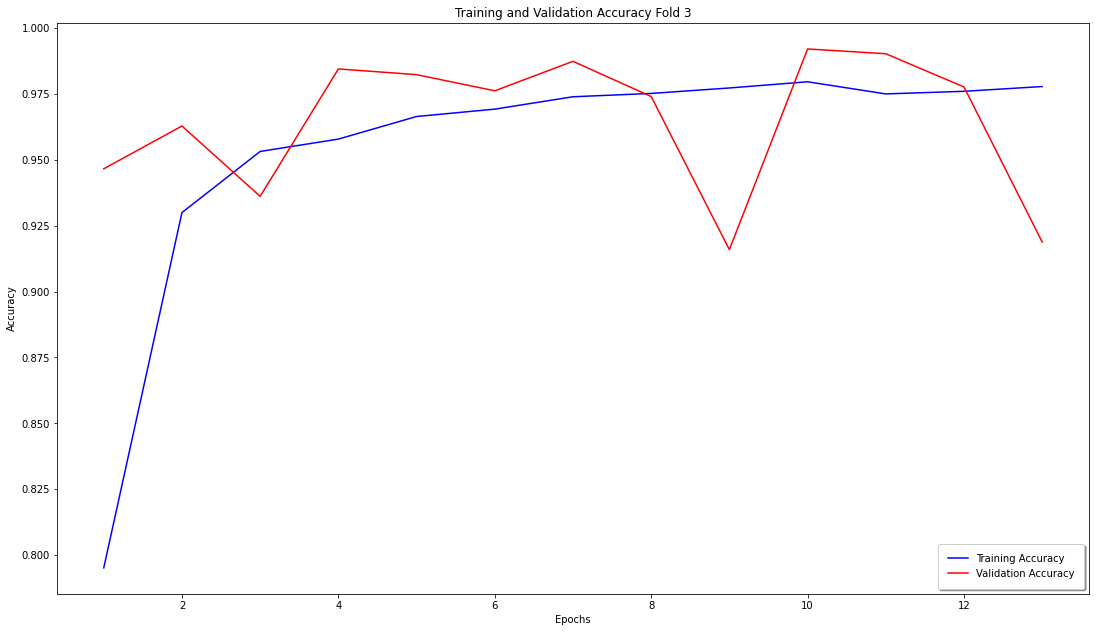

In [ ]:
history = all_history['history-fold-3'].history
loss_values = history["accuracy"]
val_loss_values = history["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy Fold 3")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

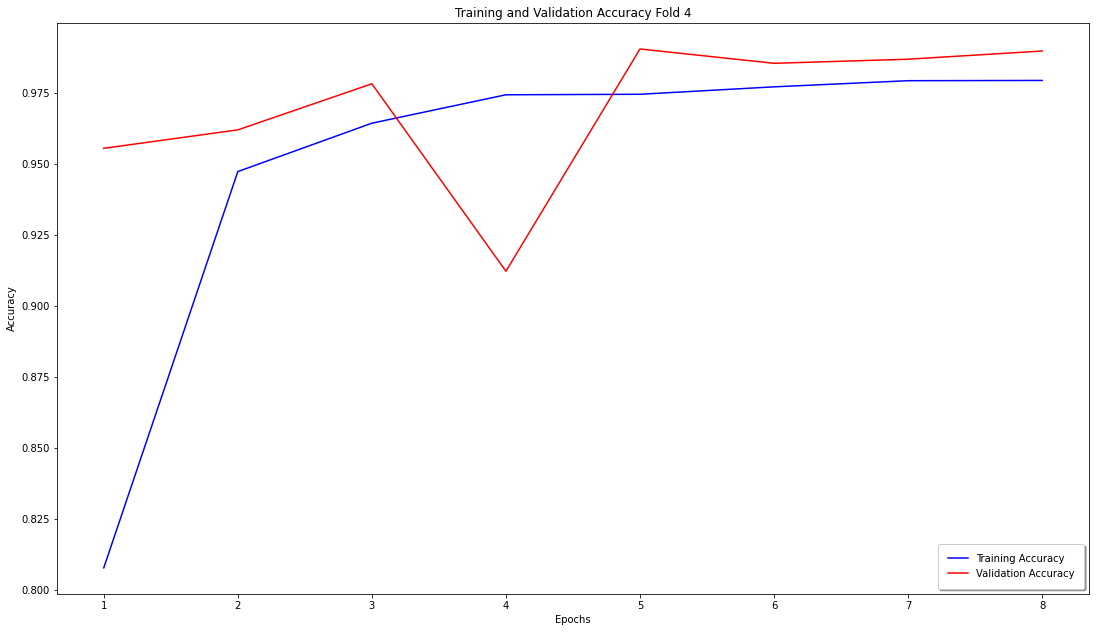

In [ ]:
history = all_history['history-fold-4'].history
loss_values = history["accuracy"]
val_loss_values = history["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy Fold 4")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

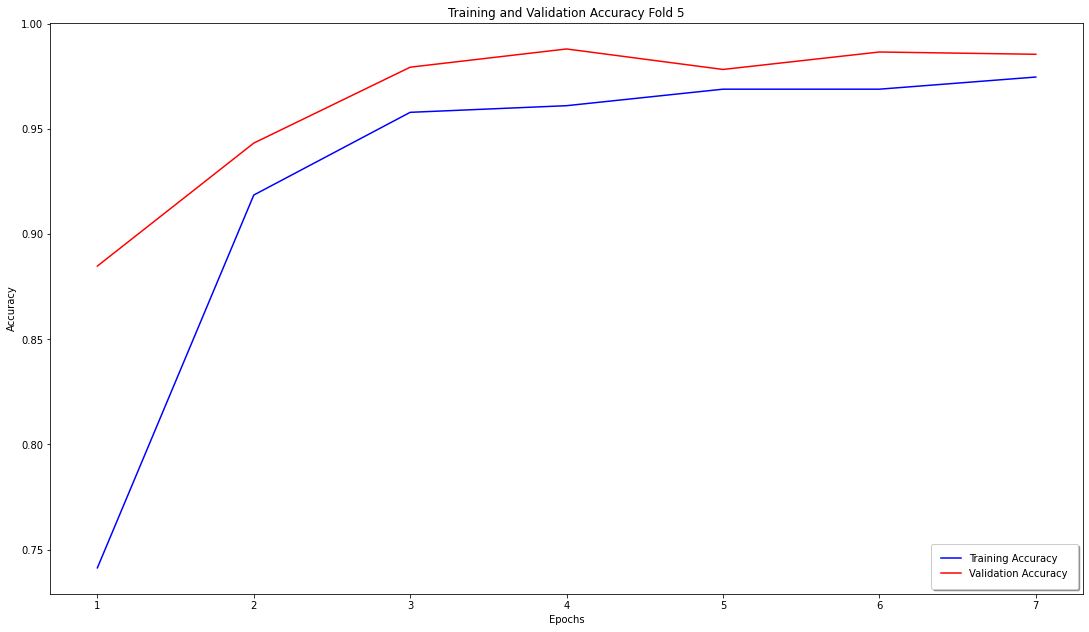

In [ ]:
history = all_history['history-fold-5'].history
loss_values = history["accuracy"]
val_loss_values = history["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy Fold 5")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

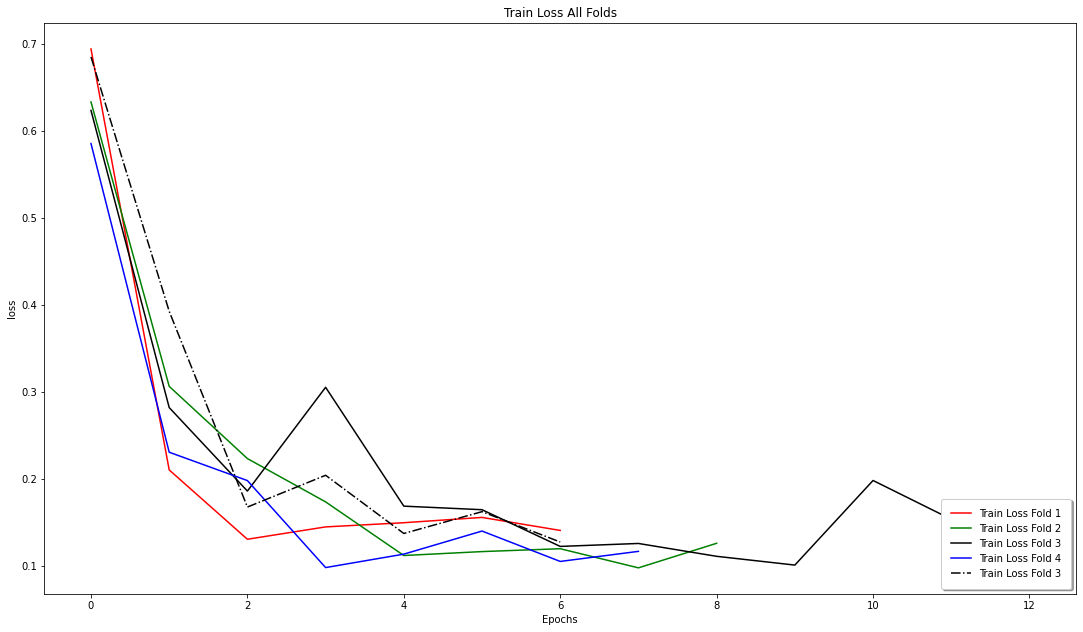

In [ ]:
plt.title('Train Loss All Folds')
plt.plot(all_history['history-fold-1'].history['loss'], label='Train Loss Fold 1', color='red')
plt.plot(all_history['history-fold-2'].history['loss'], label='Train Loss Fold 2', color='green')
plt.plot(all_history['history-fold-3'].history['loss'], label='Train Loss Fold 3', color='black')
plt.plot(all_history['history-fold-4'].history['loss'], label='Train Loss Fold 4', color='blue')
plt.plot(all_history['history-fold-5'].history['loss'], label='Train Loss Fold 3', color='black', linestyle = "dashdot")

plt.xlabel("Epochs")
plt.ylabel("loss")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

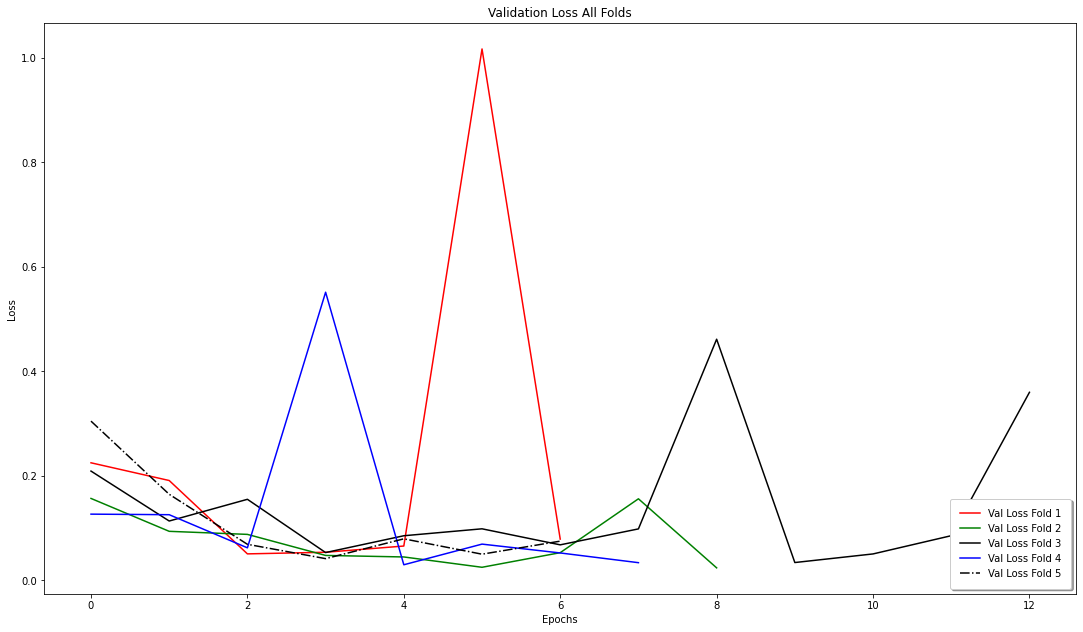

In [ ]:
# fig, axs = plt.subplots(2, 1, figsize=(15,15)) 

plt.title('Validation Loss All Folds')
plt.plot(all_history['history-fold-1'].history['val_loss'], label='Val Loss Fold 1', color='red')
plt.plot(all_history['history-fold-2'].history['val_loss'], label='Val Loss Fold 2', color='green')
plt.plot(all_history['history-fold-3'].history['val_loss'], label='Val Loss Fold 3', color='black')
plt.plot(all_history['history-fold-4'].history['val_loss'], label='Val Loss Fold 4', color='blue')
plt.plot(all_history['history-fold-5'].history['val_loss'], label='Val Loss Fold 5', color='black', linestyle = "dashdot")

plt.xlabel("Epochs")
plt.ylabel("Loss")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

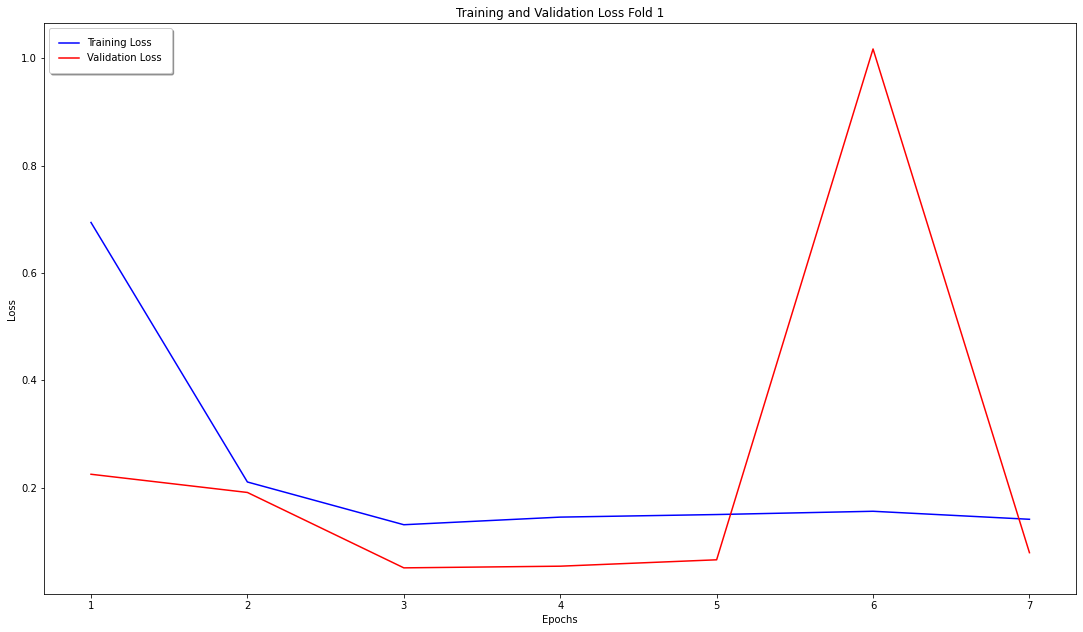

In [ ]:
history = all_history['history-fold-1'].history
loss_values = history["loss"]
val_loss_values = history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Loss")
plt.plot(epochs, val_loss_values, "r", label="Validation Loss")
plt.title("Training and Validation Loss Fold 1")
plt.xlabel("Epochs")
plt.ylabel("Loss")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

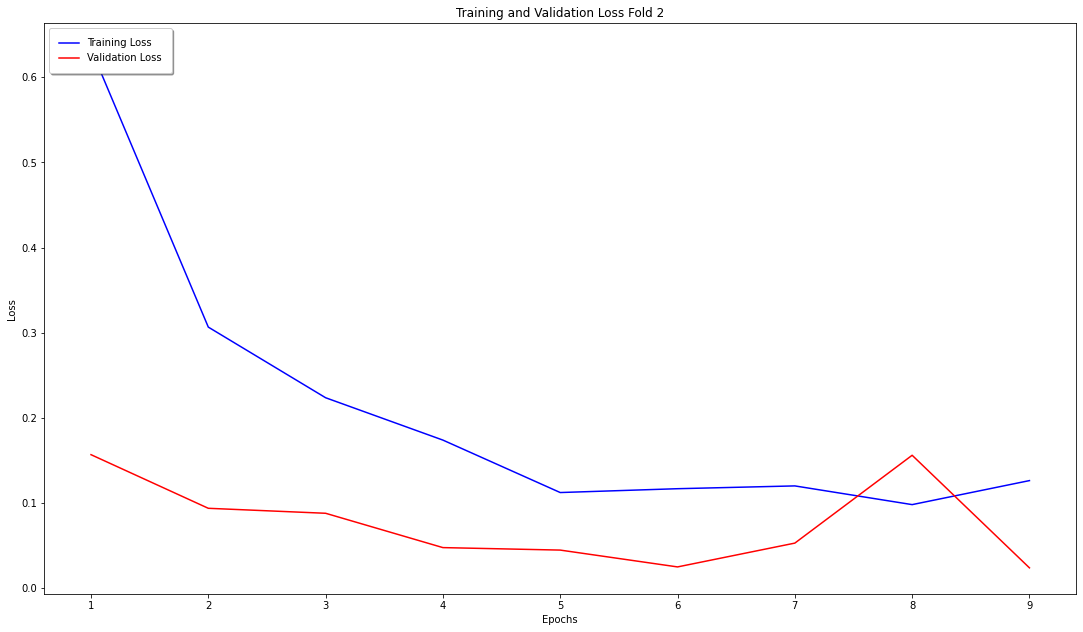

In [ ]:
history = all_history['history-fold-2'].history
loss_values = history["loss"]
val_loss_values = history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Loss")
plt.plot(epochs, val_loss_values, "r", label="Validation Loss")
plt.title("Training and Validation Loss Fold 2")
plt.xlabel("Epochs")
plt.ylabel("Loss")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

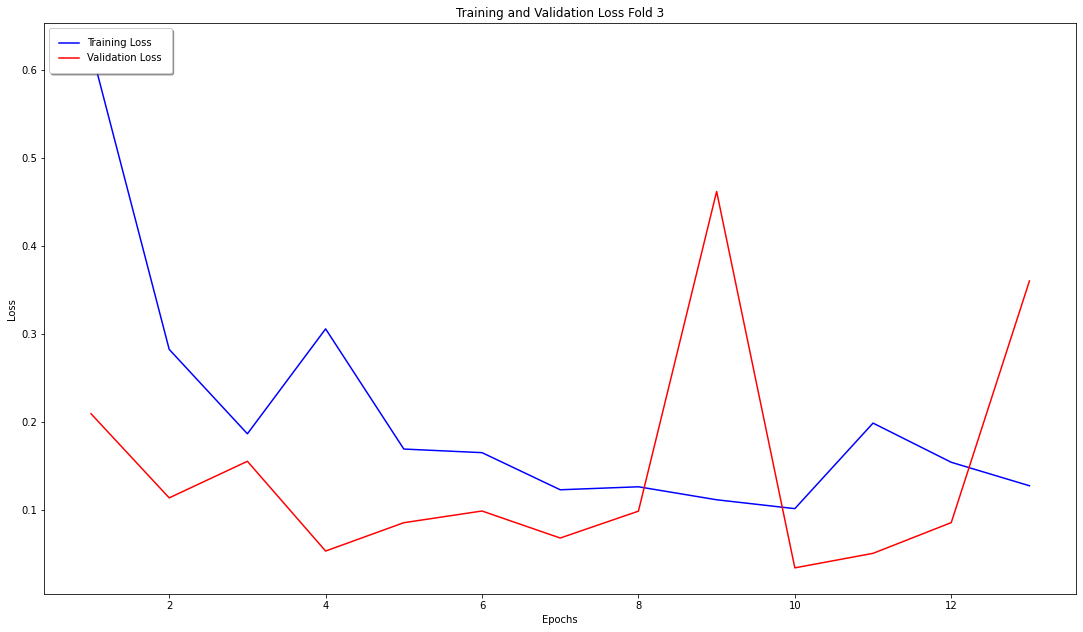

In [ ]:
history = all_history['history-fold-3'].history
loss_values = history["loss"]
val_loss_values = history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Loss")
plt.plot(epochs, val_loss_values, "r", label="Validation Loss")
plt.title("Training and Validation Loss Fold 3")
plt.xlabel("Epochs")
plt.ylabel("Loss")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

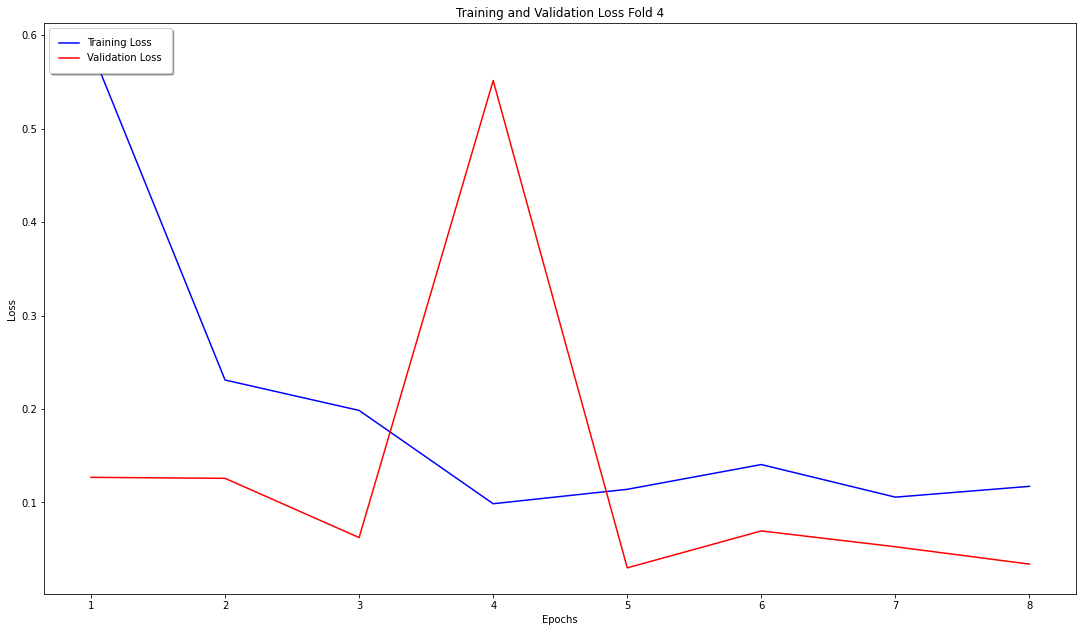

In [ ]:
history = all_history['history-fold-4'].history
loss_values = history["loss"]
val_loss_values = history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Loss")
plt.plot(epochs, val_loss_values, "r", label="Validation Loss")
plt.title("Training and Validation Loss Fold 4")
plt.xlabel("Epochs")
plt.ylabel("Loss")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

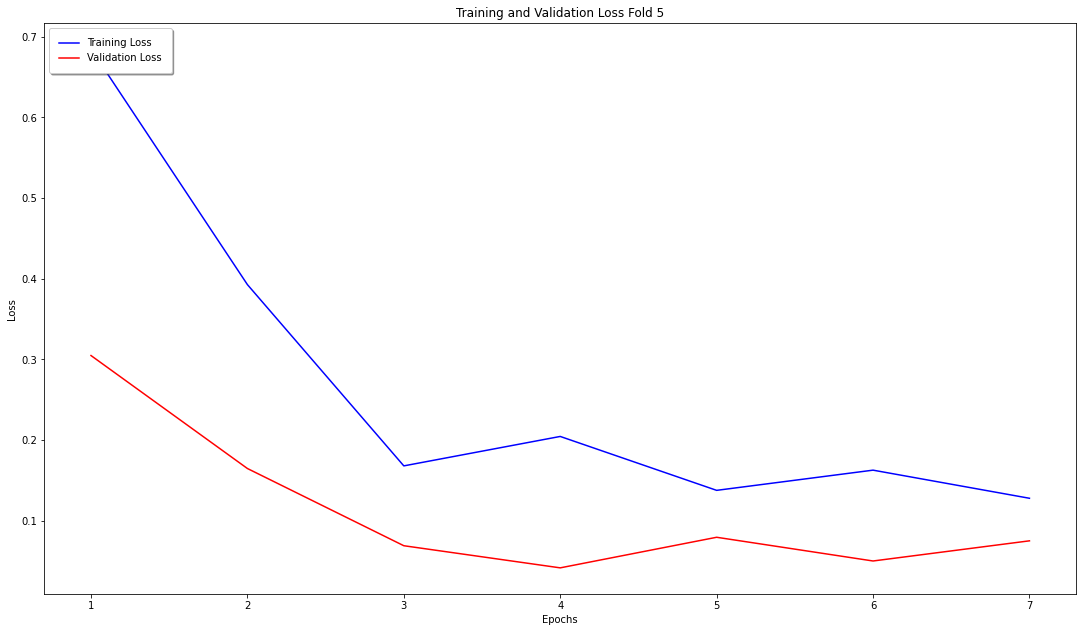

In [ ]:
history = all_history['history-fold-5'].history
loss_values = history["loss"]
val_loss_values = history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training Loss")
plt.plot(epochs, val_loss_values, "r", label="Validation Loss")
plt.title("Training and Validation Loss Fold 5")
plt.xlabel("Epochs")
plt.ylabel("Loss")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

# Post-Processing

In [ ]:
model = keras.models.load_model('/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/New_Model_SGD_Saved_Model_3/best-model-kfold-5.hdf5')

Method 1

In [ ]:
test_directory = '/content/drive/Shareddrives/ECEN 404 Machine Learning/Color/Final Model Bell Pepper/Test'

In [ ]:
test_data = []
classes = ["Healthy", "Bacterial Spot"]
def create_test_data():
  for i in classes:
    path = os.path.join(test_directory, i)   # directory path for test rice images
    class_num = classes.index(i)
    for img in os.listdir(path):    # Include try catch? 10:18
      img_array = cv2.imread(os.path.join(path,img))
      img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)      
      img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA)
      
      test_data.append([img_array, class_num])


create_test_data()

In [ ]:
X_test = []
y_test = []

In [ ]:
for img, classes in test_data:
  X_test.append(img)
  y_test.append(classes)

In [ ]:
X_test = np.array(X_test)
X_test.shape

(494, 256, 256, 3)

In [ ]:
X_test = X_test/255.0

In [ ]:
y_test = np.array(y_test)

In [ ]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 7s 33ms/step - loss: 0.0171 - accuracy: 0.9960


[0.01710614003241062, 0.9959514141082764]

In [ ]:
y_pred = model.predict(X_test, verbose=0)

In [ ]:
print(y_pred.flatten())

In [ ]:
pred_mean = np.mean(y_pred)

In [ ]:
y_pred1 = np.where(y_pred > pred_mean, 1, 0)

In [ ]:
print(y_pred1)

In [ ]:
print(confusion_matrix(y_test, y_pred1))

[[294   1]
 [  1 198]]


In [ ]:
## ANOTHER METHOD
y_pred = model.predict(X_test, verbose=0)

In [ ]:
y_pred_1 = np.round(y_pred1).tolist()

print(y_pred_1)

In [ ]:
print(confusion_matrix(y_test, y_pred_1))

[[294   1]
 [  1 198]]


<ipython-input-24-1ee4db98ec15>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().set_title("Binary Classifier Confusion Matrix")
<ipython-input-24-1ee4db98ec15>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().set_xlabel("Predicted Labels")
<ipython-input-24-1ee4db98ec15>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance. 

[Text(0, 0.5, 'Healthy'), Text(0, 1.5, 'Bacterial Spot')]

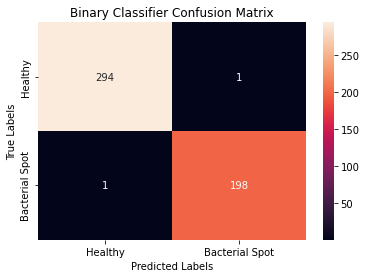

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, fmt='g', ax = plt.subplot()) #annot allows me to annotate the cells, fmt='g' disables scientific notation
plt.subplot().set_title("Binary Classifier Confusion Matrix")
plt.subplot().set_xlabel("Predicted Labels")
plt.subplot().set_ylabel("True Labels")
plt.subplot().xaxis.set_ticklabels(["Healthy", "Bacterial Spot"])
plt.subplot().yaxis.set_ticklabels(["Healthy", "Bacterial Spot"])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1, target_names=["Bell_Pepper_Healthy", "Bell_Pepper_Bacterial_Spot"]))

                            precision    recall  f1-score   support

       Bell_Pepper_Healthy       1.00      1.00      1.00       295
Bell_Pepper_Bacterial_Spot       0.99      0.99      0.99       199

                  accuracy                           1.00       494
                 macro avg       1.00      1.00      1.00       494
              weighted avg       1.00      1.00      1.00       494



In [ ]:
print(confusion_matrix(y_test, y_pred1))